### 데이터 다루기 연습

In [1]:
data_file = open("mnist_dataset/mnist_train_100.csv","r")
data_list = data_file.readlines()
data_file.close()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

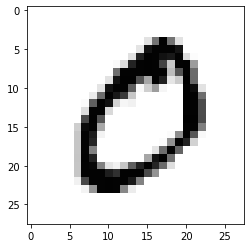

In [24]:
all_values = data_list[1].split(',')  #,로 구분된 스트링 상의 숫자를 구분해서 리스트로 만든다
image_array = np.asfarray(all_values[1:]).reshape((28,28)) #문자열 숫자를 숫자로 바꿔서 28행28열 행렬로 재구성한다
plt.imshow(image_array, cmap="Greys", interpolation="None")  #시각화한다

In [25]:
scaled_input = (np.asfarray(all_values[1:])/255.0*0.99) + 0.01  #입력값이 0.11~1.0 사이의 값이 되도록 조정
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [22]:
onodes = 10 #우리가 최종으로 판단할 레이블(숫자개수)은 10개
targets = np.zeros(onodes) + 0.01  # 해당 레이블이 아닌 인덱스값은 0.01이 나오게 하고
targets[int(all_values[0])] = 0.99  # 정답인 레이블은 0.99 값이 나오는 것이 최종 목표

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

## 3계층의 신경망으로 MNIST 손글씨 data 학습 (전체)

In [2]:
#필요한 라이브러리 호출
import numpy as np  
import scipy.special #행렬시각화 라이브러리
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#신경망 클래스 정의
class neuralNetwork:
        def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
            self.inodes = inputnodes
            self.hnodes = hiddennodes
            self.onodes = outputnodes
            
            self.lr = learningrate
            
            self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
            self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
            self.activaton_function = lambda x: scipy.special.expit(x)
            
        def train(self, inputs_list, targets_list):
            # < 1: 주어진 학습데이터에 대해 결과 값 계산 >
            inputs = np.array(inputs_list, ndmin=2).T
            targets = np.array(targets_list, ndmin=2).T
            
            hidden_inputs = np.dot(self.wih, inputs)
            hidden_outputs = self.activaton_function(hidden_inputs)
            
            final_inputs = np.dot(self.who, hidden_outputs)
            final_outputs = self.activaton_function(final_inputs)
            
            #< 2: 1의 값과 실제값을 비교해서 error를 가중치 업데이트에 이용 >
            output_errors = targets - final_outputs
            hidden_errors = np.dot(self.who.T, output_errors)
            
            self.who += self.lr*np.dot((output_errors*final_outputs*(1.0-final_outputs)), np.transpose(hidden_outputs))
            self.wih += self.lr*np.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)), np.transpose(inputs))
            
            
        def query(self, inputs_list):
            inputs = np.array(inputs_list, ndmin=2).T
            
            hidden_inputs = np.dot(self.wih, inputs)
            hidden_outputs = self.activaton_function(hidden_inputs)
            
            final_inputs = np.dot(self.who, hidden_outputs)
            final_outputs = self.activaton_function(final_inputs)
            
            return final_outputs

In [24]:
#input, hidden, output layer노드수 정하기
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

#learning rate 는 임의로 0.3
learning_rate = 0.3

#NN의 instance생성
n = neuralNetwork(input_nodes,hidden_nodes, output_nodes, learning_rate)

# csv파일에서 데이터 준비
training_data_file = open("mnist_dataset/mnist_train_100.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

#신경망 학습시키기
#학습 데이터 모음 내 모든 레코드 탐색
for record in training_data_list:
    all_values = record.split(",")
    inputs = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
    targets = np.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)

### 테스트 데이터로 확인하기

In [25]:
#테스트 데이터 가져오기
test_data_file = open("mnist_dataset/mnist_test_10.csv","r")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [10]:
#첫번째 숫자 맞췄는지 확인하기
all_values = test_data_list[0].split(',')
print(all_values[0])

7


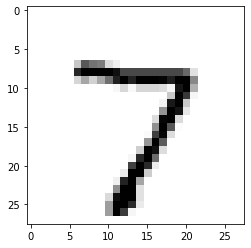

In [13]:
image_arr = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_arr, cmap = 'Greys', interpolation = 'None')

In [15]:
n.query((np.asfarray(all_values[1:])/255.0*0.99)+0.01)

array([[0.05254608],
       [0.00512849],
       [0.01925336],
       [0.11700799],
       [0.02010577],
       [0.02219045],
       [0.01005386],
       [0.83327153],
       [0.0216544 ],
       [0.03790603]])

### 테스트 결과 기록하기

In [26]:
#성능의 지표가 될 성적표 초기화
scorecard = []

for record in test_data_list:
    all_values = record.split(",")
    correct_label = int(all_values[0])
    print("correct label:",correct_label)
    inputs = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
    outputs = n.query(inputs)
    label = np.argmax(outputs)
    print("nn's answer:",label)
    
    if(label==correct_label): scorecard.append(1)
    else : scorecard.append(0)

correct label: 7
nn's answer: 7
correct label: 2
nn's answer: 0
correct label: 1
nn's answer: 1
correct label: 0
nn's answer: 0
correct label: 4
nn's answer: 4
correct label: 1
nn's answer: 1
correct label: 4
nn's answer: 4
correct label: 9
nn's answer: 4
correct label: 5
nn's answer: 4
correct label: 9
nn's answer: 7


In [27]:
scorecard_arr = np.asarray(scorecard)
print('Performance =', scorecard_arr.sum()/scorecard_arr.size)

Performance = 0.6
